In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import numpy as np
import pandas as pd
import os
from skimage.transform import resize
from keras.preprocessing.image import array_to_img, img_to_array, load_img#,save_img
from skimage.io import imread, imshow #, concatenate_images
import PIL 
from PIL import Image
import re

['metadata.csv', 'train_masks', 'train_masks.csv', 'test', 'train', 'sample_submission.csv']


Using TensorFlow backend.


In [2]:
!mkdir images
!ls -l '../input/train'

total 517504
-rw-r--r-- 1 root root  95862 Dec  7 10:35 00087a6bd4dc_01.jpg
-rw-r--r-- 1 root root 101777 Dec  7 10:35 00087a6bd4dc_02.jpg
-rw-r--r-- 1 root root 104894 Dec  7 10:35 00087a6bd4dc_03.jpg
-rw-r--r-- 1 root root 105737 Dec  7 10:35 00087a6bd4dc_04.jpg
-rw-r--r-- 1 root root 105479 Dec  7 10:35 00087a6bd4dc_05.jpg
-rw-r--r-- 1 root root 105452 Dec  7 10:35 00087a6bd4dc_06.jpg
-rw-r--r-- 1 root root 105930 Dec  7 10:35 00087a6bd4dc_07.jpg
-rw-r--r-- 1 root root 102312 Dec  7 10:35 00087a6bd4dc_08.jpg
-rw-r--r-- 1 root root  91490 Dec  7 10:35 00087a6bd4dc_09.jpg
-rw-r--r-- 1 root root  99928 Dec  7 10:35 00087a6bd4dc_10.jpg
-rw-r--r-- 1 root root 104478 Dec  7 10:35 00087a6bd4dc_11.jpg
-rw-r--r-- 1 root root 103691 Dec  7 10:35 00087a6bd4dc_12.jpg
-rw-r--r-- 1 root root 105276 Dec  7 10:35 00087a6bd4dc_13.jpg
-rw-r--r-- 1 root root 106731 Dec  7 10:35 00087a6bd4dc_14.jpg
-rw-r--r-- 1 root root 106196 Dec  7 10:35 00087a6bd4dc_15.jpg
-rw-r--r-- 1 root root 103227 Dec  7 10:35

In [3]:
def files_names_in_path(path="",extension=".jpg"):
    files = []
    masks = []
    for f in os.listdir(path):
        filename, file_extension = os.path.splitext(f)
        if file_extension == '.gif':
            files.append(filename.replace('_mask','')+".jpg")
            masks.append(filename+"_mask.gif")
            
    return files, masks
car_path = '../input/train/'
mask_path = '../input/train_masks/'
input_files,input_masks = files_names_in_path(mask_path)

print(input_files[0:5])


['4b74275babf7_02.jpg', '3071362591f7_04.jpg', '0495dcf27283_10.jpg', 'd1a3af34e674_01.jpg', 'fc237174b128_09.jpg']


[[[0.94901961 0.95294118 0.93333333]
  [0.94901961 0.95294118 0.93333333]
  [0.94901961 0.95294118 0.93333333]
  ...
  [0.94901961 0.94901961 0.94901961]
  [0.94901961 0.94901961 0.94901961]
  [0.94901961 0.94901961 0.94901961]]

 [[0.94901961 0.95294118 0.93333333]
  [0.94901961 0.95294118 0.93333333]
  [0.94901961 0.95294118 0.93333333]
  ...
  [0.94901961 0.94901961 0.94901961]
  [0.94901961 0.94901961 0.94901961]
  [0.94901961 0.94901961 0.94901961]]

 [[0.94901961 0.95294118 0.93333333]
  [0.94901961 0.95294118 0.93333333]
  [0.94901961 0.95294118 0.93333333]
  ...
  [0.94901961 0.94901961 0.94901961]
  [0.94901961 0.94901961 0.94901961]
  [0.94901961 0.94901961 0.94901961]]

 ...

 [[0.69019608 0.70588235 0.71764706]
  [0.69019608 0.70588235 0.71764706]
  [0.69019608 0.70588235 0.71764706]
  ...
  [0.69019608 0.70588235 0.71764706]
  [0.69019608 0.70588235 0.71764706]
  [0.69019608 0.70588235 0.71764706]]

 [[0.69019608 0.70588235 0.71764706]
  [0.69019608 0.70588235 0.71764706]


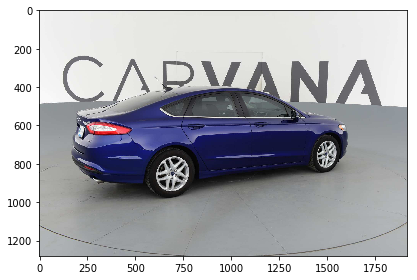

In [4]:
def load_image_and_normalize_and_resize(file_path="",normalize=True):
    if normalize:
        return (imread(file_path)/255)
    else:
        return (imread(file_path))
    

print(load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]))
print(imshow(load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,2)[0])))
print(load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]).shape)
HEIGH = load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]).shape[0]
WIDTH = load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]).shape[1]

In [5]:
!ls '../input/train_masks'

00087a6bd4dc_01_mask.gif  4df1536de792_01_mask.gif  a7b9e343cf6b_01_mask.gif
00087a6bd4dc_02_mask.gif  4df1536de792_02_mask.gif  a7b9e343cf6b_02_mask.gif
00087a6bd4dc_03_mask.gif  4df1536de792_03_mask.gif  a7b9e343cf6b_03_mask.gif
00087a6bd4dc_04_mask.gif  4df1536de792_04_mask.gif  a7b9e343cf6b_04_mask.gif
00087a6bd4dc_05_mask.gif  4df1536de792_05_mask.gif  a7b9e343cf6b_05_mask.gif
00087a6bd4dc_06_mask.gif  4df1536de792_06_mask.gif  a7b9e343cf6b_06_mask.gif
00087a6bd4dc_07_mask.gif  4df1536de792_07_mask.gif  a7b9e343cf6b_07_mask.gif
00087a6bd4dc_08_mask.gif  4df1536de792_08_mask.gif  a7b9e343cf6b_08_mask.gif
00087a6bd4dc_09_mask.gif  4df1536de792_09_mask.gif  a7b9e343cf6b_09_mask.gif
00087a6bd4dc_10_mask.gif  4df1536de792_10_mask.gif  a7b9e343cf6b_10_mask.gif
00087a6bd4dc_11_mask.gif  4df1536de792_11_mask.gif  a7b9e343cf6b_11_mask.gif
00087a6bd4dc_12_mask.gif  4df1536de792_12_mask.gif  a7b9e343cf6b_12_mask.gif
00087a6bd4dc_13_mask.gif  4df1536de792_13_mask.gif  a7b9e343cf6b_13_mask.gif

In [6]:
mask = pd.read_csv('../input/train_masks.csv')

In [7]:
len(mask)

5088

In [8]:
#https://www.kaggle.com/robertkag/rle-to-mask-converter

import numpy as np # linear algebra
#(1280, 1918, 3)

def rleToMask(rleString,height,width):
    rows, cols = height,width
    rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
    rlePairs = np.array(rleNumbers).reshape(-1,2)
    img = np.zeros(rows*cols,dtype=np.uint8)
    for index,length in rlePairs:
        index -= 1
        img[index:index+length] = 255
    img = img.reshape(cols,rows)
    img = img.T
    return img

In [9]:
#index=3
#temp_mask = rleToMask(mask['rle_mask'][3],WIDTH,HEIGH)
#print(temp_mask.shape)
#rotated_mask = np.rot90(np.rot90(np.rot90(temp_mask)))
#imshow(rotated_mask)


In [10]:
len(input_files)

5088

In [11]:
import cv2
indx=5000
carimage = car_path+input_files[indx]
maskimage = mask_path+input_files[indx].replace('.jpg','_mask.gif')

print(carimage)
print(maskimage)
img = cv2.imread(carimage)
#mask = cv2.imread(maskimage)
mask=imread(maskimage)
print(mask)

# get first masked value (foreground)
fg = cv2.bitwise_or(img, img, mask=mask)
# get second masked value (background) mask must be inverted
mask = cv2.bitwise_not(mask)
background = np.full(img.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(background, background, mask=mask)

# combine foreground+background
final = cv2.bitwise_or(fg, bk)



../input/train/fff9b3a5373f_12.jpg
../input/train_masks/fff9b3a5373f_12_mask.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


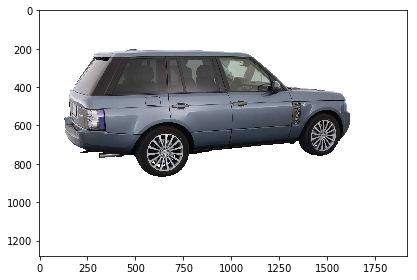

In [12]:
imshow(final)

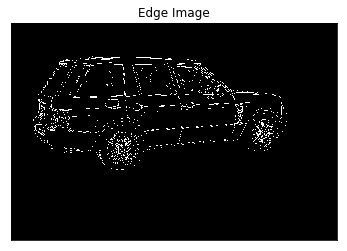

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = final
edges = cv2.Canny(img,50,100)

#plt.subplot(121),
plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


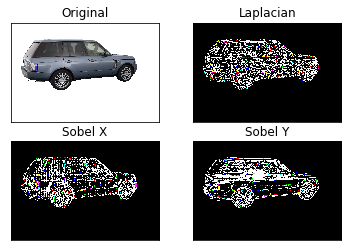

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = final

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

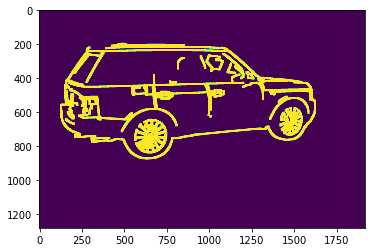

In [15]:
#https://www.kaggle.com/ayalamann/bounding-boxes-using-image-processing
img=final
blurred = cv2.GaussianBlur(img, (7,7), 0) # Remove noise
#close the small line gaps using errosion
kernel = np.ones((3,3), np.uint8)
erode = cv2.erode(blurred, kernel, iterations = 3)
plt.imshow(erode)
#cannyedge 
def canny_edge_detector(input_img, threshold1, threshold2, draw=True, save=True):
    canny_img = cv2.cvtColor(np.copy(input_img), cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(canny_img, threshold1, threshold2)
    return edges
#try adding Eroding before edge detection(increase black lines)
canny_edges = canny_edge_detector(input_img=erode, threshold1=100, threshold2=150) 
plt.imshow(canny_edges)

#close the small line gaps using dilation
kernel = np.ones((5,5), np.uint8)
dilation_canny = cv2.dilate(canny_edges, kernel, iterations = 3)
canny_blurred = cv2.GaussianBlur(dilation_canny, (3,3), 0) # Remove noise
plt.imshow(canny_blurred)

In [16]:
#Fantastico! tenemos los trazos! y tenemos los estilos!


AxesImage(38.5601,27.8;382.64x245.485)


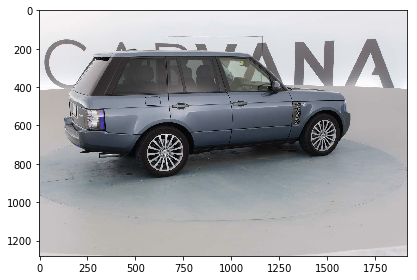

In [17]:
print(imshow(cv2.imread(carimage)))

AxesImage(10.8,27.8;410.4x245.825)


/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


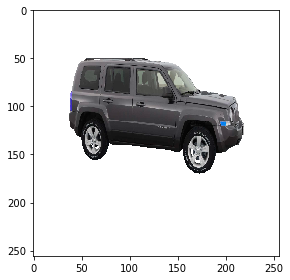

In [18]:
#try put in the box beauty with files generator
indx=4050
H=256
W=256
def downsample(img, h, w):
    return resize(img, (H, W), mode='constant', preserve_range=True)

def get_clean_image(path,path_mask,h, w):
    indx=5000
    
    img = cv2.imread(path)
    img = cv2.resize(img, (h, w))
    # print(imshow(img))
    #mask = cv2.imread(maskimage)
    mask=np.int8(downsample(imread(path_mask),h,w))
    # print(mask)
    #    print(mask)
    
    # get first masked value (foreground)
    fg = cv2.bitwise_or(img, img, mask=mask)
    # get second masked value (background) mask must be inverted
    mask = cv2.bitwise_not(mask)
    background = np.full(img.shape, 255, dtype=np.uint8)
    bk = cv2.bitwise_or(background, background, mask=mask)

    # combine foreground+background
    final = cv2.bitwise_or(fg, bk)
    #final=img
    return final
    #cannyedge 
def canny_edge_detector(input_img, threshold1, threshold2, draw=True, save=True):
    canny_img = cv2.cvtColor(np.copy(input_img), cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(canny_img, threshold1, threshold2)
    return edges
    
def get_edge_by_image(img):
    blurred = cv2.GaussianBlur(img, (7,7), 0) # Remove noise
    #close the small line gaps using errosion
    kernel = np.ones((3,3), np.uint8)
    erode = cv2.erode(blurred, kernel, iterations = 3)
    # plt.imshow(erode)

    #try adding Eroding before edge detection(increase black lines)
    canny_edges = canny_edge_detector(input_img=erode, threshold1=100, threshold2=150) 
    # plt.imshow(canny_edges)
    return np.invert(canny_edges).reshape((H,W,1))
    # refined remove noise
    #close the small line gaps using dilation
    kernel = np.ones((5,5), np.uint8)
    dilation_canny = cv2.dilate(canny_edges, kernel, iterations = 3)
    canny_blurred = cv2.GaussianBlur(dilation_canny, (3,3), 0) # Remove noise
    #plt.imshow(canny_blurred)
    return np.invert(canny_edges).reshape((H,W,1))
carimage = car_path+input_files[indx]
maskimage = mask_path+input_files[indx].replace('.jpg','_mask.gif')
img = get_clean_image(carimage, maskimage,H,W)
print(imshow(img))


AxesImage(10.8,27.8;410.4x245.825)


(256, 256, 1)

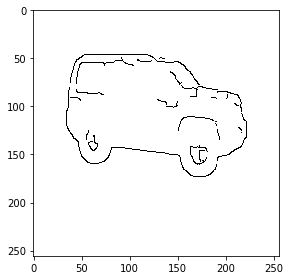

In [19]:
edge = get_edge_by_image(img)
print(imshow(edge.reshape(H,W)))
edge.shape

In [20]:
import skimage
BATCH_SIZE=32
def generator(path, batch_size=BATCH_SIZE, normalize=True):
    retedge = np.zeros((batch_size,H,W,3))
    retimg = np.zeros((batch_size,H,W,3))
    for x in range(batch_size):
        car = np.random.choice(path,1)[0]
        carpath = car_path+car
        maskpath = mask_path+car.replace('.jpg','_mask.gif')
        #print(maskpath)
        img =  get_clean_image(carpath, maskpath, H, W)
        # print(img.shape)
        #imshow(img)
        retimg[x] = img
        
        mask = get_edge_by_image(img)
        mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
        # mask = skimage.color.gray2rgb(mask.reshape(H,W,1))
        #print(mask.shape)
        retedge[x] = mask
    
    if normalize:
        retimg = retimg/255
        retedge = retedge/255
    return retedge, retimg

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


AxesImage(10.8,27.8;410.4x245.825)


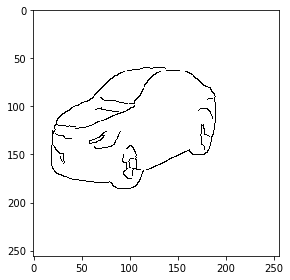

In [21]:
sampleEdge, sampleCar = generator(input_files,32)
print(imshow(sampleEdge[0]))

AxesImage(10.8,27.8;410.4x245.825)


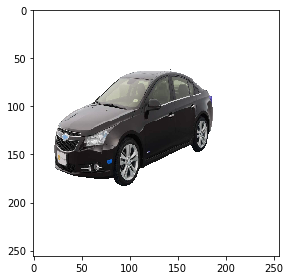

In [22]:
print(imshow(sampleCar[0]))


In [23]:
from sklearn.model_selection import train_test_split
train_input, test_input, _, _ = train_test_split(input_files, input_files, test_size=0.15, random_state=42)
print(len(train_input))
print(len(test_input))

4324
764


In [24]:
# ok we have all needed canyedge downsamples and generator
import scipy

from keras.datasets import mnist
#from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
#from data_loader import DataLoader
import numpy as np
import os

from keras.layers import Layer, InputSpec
from keras import initializers, regularizers, constraints
from keras import backend as K


class InstanceNormalization(Layer):
    """Instance normalization layer.
    Normalize the activations of the previous layer at each step,
    i.e. applies a transformation that maintains the mean activation
    close to 0 and the activation standard deviation close to 1.
    # Arguments
        axis: Integer, the axis that should be normalized
            (typically the features axis).
            For instance, after a `Conv2D` layer with
            `data_format="channels_first"`,
            set `axis=1` in `InstanceNormalization`.
            Setting `axis=None` will normalize all values in each
            instance of the batch.
            Axis 0 is the batch dimension. `axis` cannot be set to 0 to avoid errors.
        epsilon: Small float added to variance to avoid dividing by zero.
        center: If True, add offset of `beta` to normalized tensor.
            If False, `beta` is ignored.
        scale: If True, multiply by `gamma`.
            If False, `gamma` is not used.
            When the next layer is linear (also e.g. `nn.relu`),
            this can be disabled since the scaling
            will be done by the next layer.
        beta_initializer: Initializer for the beta weight.
        gamma_initializer: Initializer for the gamma weight.
        beta_regularizer: Optional regularizer for the beta weight.
        gamma_regularizer: Optional regularizer for the gamma weight.
        beta_constraint: Optional constraint for the beta weight.
        gamma_constraint: Optional constraint for the gamma weight.
    # Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a Sequential model.
    # Output shape
        Same shape as input.
    # References
        - [Layer Normalization](https://arxiv.org/abs/1607.06450)
        - [Instance Normalization: The Missing Ingredient for Fast Stylization](
        https://arxiv.org/abs/1607.08022)
    """
    def __init__(self,
                 axis=None,
                 epsilon=1e-3,
                 center=True,
                 scale=True,
                 beta_initializer='zeros',
                 gamma_initializer='ones',
                 beta_regularizer=None,
                 gamma_regularizer=None,
                 beta_constraint=None,
                 gamma_constraint=None,
                 **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.supports_masking = True
        self.axis = axis
        self.epsilon = epsilon
        self.center = center
        self.scale = scale
        self.beta_initializer = initializers.get(beta_initializer)
        self.gamma_initializer = initializers.get(gamma_initializer)
        self.beta_regularizer = regularizers.get(beta_regularizer)
        self.gamma_regularizer = regularizers.get(gamma_regularizer)
        self.beta_constraint = constraints.get(beta_constraint)
        self.gamma_constraint = constraints.get(gamma_constraint)

    def build(self, input_shape):
        ndim = len(input_shape)
        if self.axis == 0:
            raise ValueError('Axis cannot be zero')

        if (self.axis is not None) and (ndim == 2):
            raise ValueError('Cannot specify axis for rank 1 tensor')

        self.input_spec = InputSpec(ndim=ndim)

        if self.axis is None:
            shape = (1,)
        else:
            shape = (input_shape[self.axis],)

        if self.scale:
            self.gamma = self.add_weight(shape=shape,
                                         name='gamma',
                                         initializer=self.gamma_initializer,
                                         regularizer=self.gamma_regularizer,
                                         constraint=self.gamma_constraint)
        else:
            self.gamma = None
        if self.center:
            self.beta = self.add_weight(shape=shape,
                                        name='beta',
                                        initializer=self.beta_initializer,
                                        regularizer=self.beta_regularizer,
                                        constraint=self.beta_constraint)
        else:
            self.beta = None
        self.built = True

    def call(self, inputs, training=None):
        input_shape = K.int_shape(inputs)
        reduction_axes = list(range(0, len(input_shape)))

        if self.axis is not None:
            del reduction_axes[self.axis]

        del reduction_axes[0]

        mean = K.mean(inputs, reduction_axes, keepdims=True)
        stddev = K.std(inputs, reduction_axes, keepdims=True) + self.epsilon
        normed = (inputs - mean) / stddev

        broadcast_shape = [1] * len(input_shape)
        if self.axis is not None:
            broadcast_shape[self.axis] = input_shape[self.axis]

        if self.scale:
            broadcast_gamma = K.reshape(self.gamma, broadcast_shape)
            normed = normed * broadcast_gamma
        if self.center:
            broadcast_beta = K.reshape(self.beta, broadcast_shape)
            normed = normed + broadcast_beta
        return normed

    def get_config(self):
        config = {
            'axis': self.axis,
            'epsilon': self.epsilon,
            'center': self.center,
            'scale': self.scale,
            'beta_initializer': initializers.serialize(self.beta_initializer),
            'gamma_initializer': initializers.serialize(self.gamma_initializer),
            'beta_regularizer': regularizers.serialize(self.beta_regularizer),
            'gamma_regularizer': regularizers.serialize(self.gamma_regularizer),
            'beta_constraint': constraints.serialize(self.beta_constraint),
            'gamma_constraint': constraints.serialize(self.gamma_constraint)
        }
        base_config = super(InstanceNormalization, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
class DiscoGAN():
    def __init__(self):
        # Input shape

        self.img_rows = H
        self.img_cols = W
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        # Configure data loader
        self.dataset_name = 'cartedge'
        #self.data_loader = DataLoader(dataset_name=self.dataset_name,
        #                              img_res=(self.img_rows, self.img_cols))


        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2**4)
        self.disc_patch = (patch, patch, 1)

        # Number of filters in the first layer of G and D
        self.gf = 64
        self.df = 64

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminators
        self.d_A = self.build_discriminator()
        self.d_B = self.build_discriminator()
        self.d_A.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.d_B.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        #-------------------------
        # Construct Computational
        #   Graph of Generators
        #-------------------------

        # Build the generators
        self.g_AB = self.build_generator()
        self.g_BA = self.build_generator()

        # Input images from both domains
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # Translate images to the other domain
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        # Translate images back to original domain
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)

        # For the combined model we will only train the generators
        self.d_A.trainable = False
        self.d_B.trainable = False

        # Discriminators determines validity of translated images
        valid_A = self.d_A(fake_A)
        valid_B = self.d_B(fake_B)

        # Objectives
        # + Adversarial: Fool domain discriminators
        # + Translation: Minimize MAE between e.g. fake B and true B
        # + Cycle-consistency: Minimize MAE between reconstructed images and original
        self.combined = Model(inputs=[img_A, img_B],
                              outputs=[ valid_A, valid_B,
                                        fake_B, fake_A,
                                        reconstr_A, reconstr_B ])
        self.combined.compile(loss=['mse', 'mse',
                                    'mae', 'mae',
                                    'mae', 'mae'],
                              optimizer=optimizer)

    def build_generator(self):
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4, normalize=True):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if normalize:
                d = InstanceNormalization()(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = InstanceNormalization()(u)
            u = Concatenate()([u, skip_input])
            return u

        # Image input
        d0 = Input(shape=self.img_shape)

        # Downsampling
        d1 = conv2d(d0, self.gf, normalize=False)
        d2 = conv2d(d1, self.gf*2)
        d3 = conv2d(d2, self.gf*4)
        d4 = conv2d(d3, self.gf*8)
        d5 = conv2d(d4, self.gf*8)
        d6 = conv2d(d5, self.gf*8)
        d7 = conv2d(d6, self.gf*8)

        # Upsampling
        u1 = deconv2d(d7, d6, self.gf*8)
        u2 = deconv2d(u1, d5, self.gf*8)
        u3 = deconv2d(u2, d4, self.gf*8)
        u4 = deconv2d(u3, d3, self.gf*4)
        u5 = deconv2d(u4, d2, self.gf*2)
        u6 = deconv2d(u5, d1, self.gf)

        u7 = UpSampling2D(size=2)(u6)
        output_img = Conv2D(self.channels, kernel_size=4, strides=1,
                            padding='same', activation='tanh')(u7)

        return Model(d0, output_img)

    def build_discriminator(self):

        def d_layer(layer_input, filters, f_size=4, normalization=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if normalization:
                d = InstanceNormalization()(d)
            return d

        img = Input(shape=self.img_shape)

        d1 = d_layer(img, self.df, normalization=False)
        d2 = d_layer(d1, self.df*2)
        d3 = d_layer(d2, self.df*4)
        d4 = d_layer(d3, self.df*8)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)

        for epoch in range(epochs):

           # for batch_i, (imgs_A, imgs_B) in enumerate(self.data_loader.load_batch(batch_size)):

                # ----------------------
                #  Train Discriminators
                # ----------------------
            #imgs_A,imgs_B = generator_cyclegan(target_files,input_files,batch_size,False)
            imgs_A,imgs_B = generator(train_input, batch_size, False)
            imgs_A = (imgs_A / 127.5) -1
            imgs_B = (imgs_B / 127.5) -1
                # Translate images to opposite domain
            fake_B = self.g_AB.predict(imgs_A)
            fake_A = self.g_BA.predict(imgs_B)

            # Train the discriminators (original images = real / translated = Fake)
            dA_loss_real = self.d_A.train_on_batch(imgs_A, valid)
            dA_loss_fake = self.d_A.train_on_batch(fake_A, fake)
            dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

            dB_loss_real = self.d_B.train_on_batch(imgs_B, valid)
            dB_loss_fake = self.d_B.train_on_batch(fake_B, fake)
            dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

            # Total disciminator loss
            d_loss = 0.5 * np.add(dA_loss, dB_loss)

            # ------------------
            #  Train Generators
            # ------------------

            # Train the generators
            g_loss = self.combined.train_on_batch([imgs_A, imgs_B], [valid, valid, \
                                                                     imgs_B, imgs_A, \
                                                                     imgs_A, imgs_B])

            elapsed_time = datetime.datetime.now() - start_time
            # Plot the progress
            print ("[%d] time: %s, [d_loss: %f, g_loss: %f]" % (epoch,
                                                                   # self.data_loader.n_batches,
                                                                    elapsed_time,
                                                                    d_loss[0], g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        os.makedirs('images/%s' % self.dataset_name, exist_ok=True)
        r, c = 2, 3
        # imgs_A,imgs_B = generator_cyclegan(target_files,input_files,1,False)
        imgs_A,imgs_B = generator(test_input, 1, False)
        imgs_A = (imgs_A / 127.5) -1
        imgs_B = (imgs_B / 127.5) -1
        
#        imgs_A, imgs_B = self.data_loader.load_data(batch_size=1, is_testing=True)

        # Translate images to the other domain
        fake_B = self.g_AB.predict(imgs_A)
        fake_A = self.g_BA.predict(imgs_B)
        # Translate back to original domain
        reconstr_A = self.g_BA.predict(fake_B)
        reconstr_B = self.g_AB.predict(fake_A)

        gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Original', 'Translated', 'Reconstructed']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[j])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/disco_gan_%d.png" % ( epoch))
        plt.close()




In [25]:
if __name__ == '__main__':
    gan = DiscoGAN()
    gan.train(epochs=1500, batch_size=16, sample_interval=5)

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/opt/conda/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[0] time: 0:00:36.478024, [d_loss: 47.618790, g_loss: 186.681732]
[1] time: 0:00:39.973542, [d_loss: 54.010170, g_loss: 131.934570]
[2] time: 0:00:43.052078, [d_loss: 81.655212, g_loss: 16.882036]
[3] time: 0:00:46.165411, [d_loss: 7.562116, g_loss: 4.593059]
[4] time: 0:00:49.271366, [d_loss: 5.367831, g_loss: 6.169424]
[5] time: 0:00:52.374270, [d_loss: 1.008563, g_loss: 3.628203]
[6] time: 0:00:55.826967, [d_loss: 0.393194, g_loss: 4.813387]
[7] time: 0:00:59.103999, [d_loss: 0.311672, g_loss: 4.759380]
[8] time: 0:01:02.388245, [d_loss: 0.289639, g_loss: 4.184879]
[9] time: 0:01:05.520457, [d_loss: 0.295135, g_loss: 3.947664]
[10] time: 0:01:08.666683, [d_loss: 0.260323, g_loss: 4.073643]
[11] time: 0:01:11.979186, [d_loss: 0.263839, g_loss: 4.133727]
[12] time: 0:01:15.025686, [d_loss: 0.279379, g_loss: 4.084179]
[13] time: 0:01:18.137766, [d_loss: 0.252595, g_loss: 4.127052]
[14] time: 0:01:21.245570, [d_loss: 0.262840, g_loss: 4.125424]
[15] time: 0:01:24.382246, [d_loss: 0.2704

cartedge	    disco_gan_1330.png	disco_gan_325.png  disco_gan_665.png
disco_gan_0.png     disco_gan_1335.png	disco_gan_330.png  disco_gan_670.png
disco_gan_10.png    disco_gan_1340.png	disco_gan_335.png  disco_gan_675.png
disco_gan_100.png   disco_gan_1345.png	disco_gan_340.png  disco_gan_680.png
disco_gan_1000.png  disco_gan_135.png	disco_gan_345.png  disco_gan_685.png
disco_gan_1005.png  disco_gan_1350.png	disco_gan_35.png   disco_gan_690.png
disco_gan_1010.png  disco_gan_1355.png	disco_gan_350.png  disco_gan_695.png
disco_gan_1015.png  disco_gan_1360.png	disco_gan_355.png  disco_gan_70.png
disco_gan_1020.png  disco_gan_1365.png	disco_gan_360.png  disco_gan_700.png
disco_gan_1025.png  disco_gan_1370.png	disco_gan_365.png  disco_gan_705.png
disco_gan_1030.png  disco_gan_1375.png	disco_gan_370.png  disco_gan_710.png
disco_gan_1035.png  disco_gan_1380.png	disco_gan_375.png  disco_gan_715.png
disco_gan_1040.png  disco_gan_1385.png	disco_gan_380.png  disco_gan_720.png
disco_gan_1045.png  d

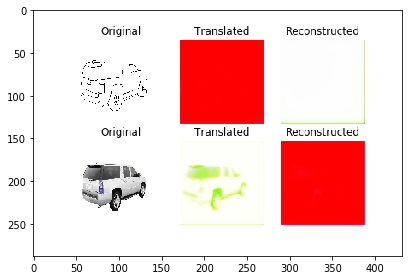

In [26]:
!ls './images'
imshow('./images/disco_gan_5.png')

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3)


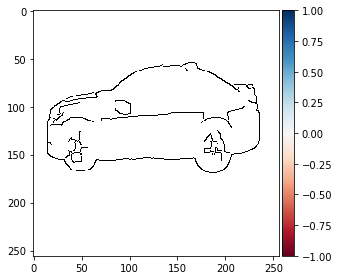

In [27]:
imgA,imgB = generator(test_input,1,False)
print(imgA.shape)
imgA = (imgA/127.5)-1
fakeB = gan.g_AB.predict(imgA)
fakeB = 0.5 * fakeB + 0.5

fakeA = gan.g_BA.predict(imgB)
fakeA = 0.5 * fakeA + 0.5

imshow(imgA[0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


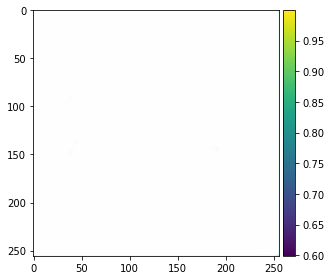

In [28]:
imshow(fakeB[0])

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3)


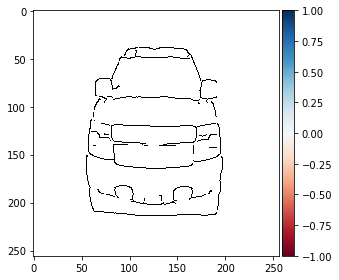

In [29]:
imgA,imgB = generator(train_input,1,False)
print(imgA.shape)
imgA = (imgA/127.5)-1
fakeB = gan.g_AB.predict(imgA)
fakeB = 0.5 * fakeB + 0.5

fakeA = gan.g_BA.predict(imgB)
fakeA = 0.5 * fakeA + 0.5

imshow(imgA[0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


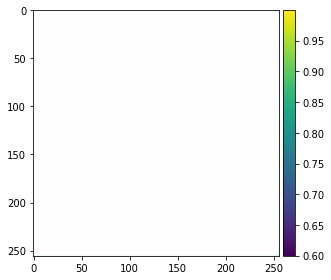

In [30]:
imshow(fakeB[0])

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3)


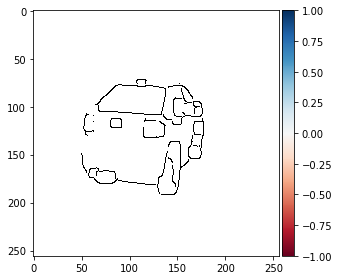

In [31]:
imgA,imgB = generator(test_input,1,False)
print(imgA.shape)
imgA = (imgA/127.5)-1
fakeB = gan.g_AB.predict(imgA)
fakeB = 0.5 * fakeB + 0.5

fakeA = gan.g_BA.predict(imgB)
fakeA = 0.5 * fakeA + 0.5

imshow(imgA[0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


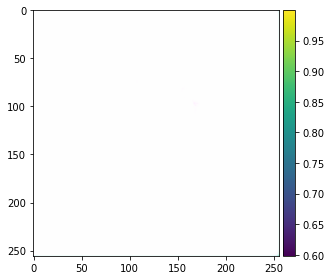

In [32]:
imshow(fakeB[0])

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3)


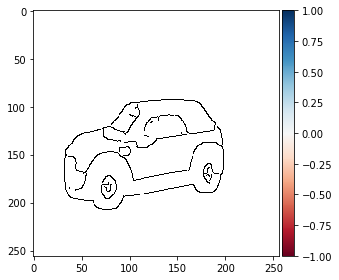

In [33]:
imgA,imgB = generator(test_input,1,False)
print(imgA.shape)
imgA = (imgA/127.5)-1
fakeB = gan.g_AB.predict(imgA)
fakeB = 0.5 * fakeB + 0.5

fakeA = gan.g_BA.predict(imgB)
fakeA = 0.5 * fakeA + 0.5

imshow(imgA[0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


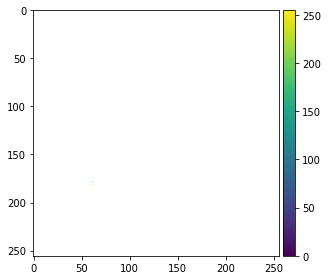

In [34]:

imshow(imgB[0])

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3)


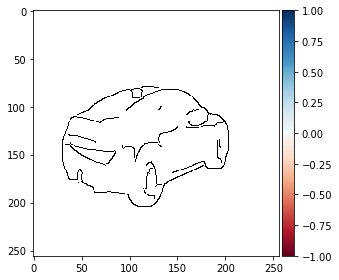

In [35]:
imgA,imgB = generator(test_input,1,False)
print(imgA.shape)
imgA = (imgA/127.5)-1
fakeB = gan.g_AB.predict(imgA)
fakeB = 0.5 * fakeB + 0.5

fakeA = gan.g_BA.predict(imgB)
fakeA = 0.5 * fakeA + 0.5

imshow(imgA[0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


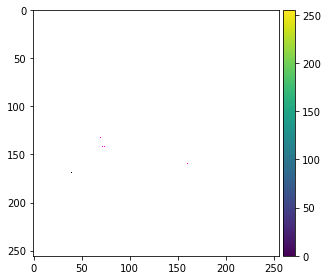

In [36]:

imshow(imgB[0])

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3)


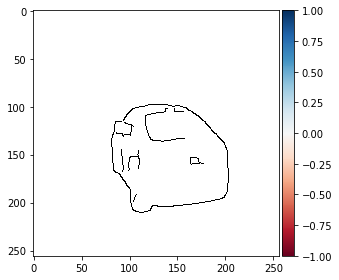

In [37]:
imgA,imgB = generator(test_input,1,False)
print(imgA.shape)
imgA = (imgA/127.5)-1
fakeB = gan.g_AB.predict(imgA)
fakeB = 0.5 * fakeB + 0.5

fakeA = gan.g_BA.predict(imgB)
fakeA = 0.5 * fakeA + 0.5

imshow(imgA[0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


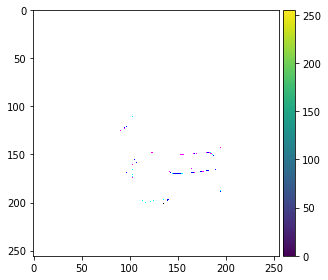

In [38]:
imshow(imgB[0])

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3)


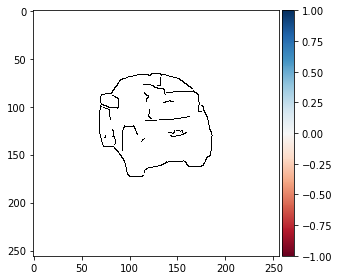

In [39]:
imgA,imgB = generator(train_input,1,False)
print(imgA.shape)
imgA = (imgA/127.5)-1
fakeB = gan.g_AB.predict(imgA)
fakeB = 0.5 * fakeB + 0.5

fakeA = gan.g_BA.predict(imgB)
fakeA = 0.5 * fakeA + 0.5

imshow(imgA[0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


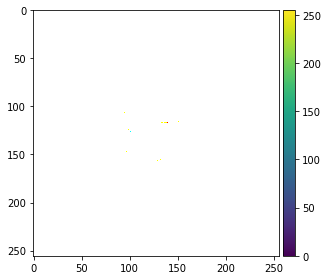

In [40]:
imshow(imgB[0])